# Week-05: Application 1 - Simulation Studies 

<font size="4"> 

In this class we will:

- Talk about how to use simulatons for statistical inference
- Plot the results of simulation studies

## 1. Import Libraries 

In [71]:
# the "numPy" library is used for mathematical operations
# the "matplotlib" library is for generating graphs
# the "pandas" library is for manipualting datasets
# write your own code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Simulate Continuous Random Variables 

<font size = "4" >

Consider a sample with $n$ observations

$ X = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{pmatrix}.$

<font size = "4" > 

We simulate from different distributions:
- Normal (mean=1, variance=4) with `np.random.normal()`
- Chi-square (degrees of freedom, df=1) with `np.random.chisquare()`
- Uniform (taking values between -5 and 5) with `np.random.uniform()`

In [72]:
# Set Sample size 
# These produce several common distributions
# A normal distribution with "loc" (mean) 1 and "scale" (standard deviation) 2
# A chi-square distribution with 1 "df" degrees of freedom
# A uniform distribution with values between -5 and 5

# Set seed for reproducibility
np.random.seed(100)

# Sample size
n_sample = 10000

# Simulate random variables
norm_vec = np.random.normal(loc=1, scale=2, size=n_sample)
chisq_vec = np.random.chisquare(df=1, size=n_sample)
unif_vec = np.random.uniform(low=-5, high=5, size=n_sample)

## 3. Report Summary Statistics

<font size = "4">

- One of the most important thing to perform data analysis is to check its summary statistics!
- You are expected to know the concept of normality assumption and what summary statistics to report given the normality assumption.
- <span style="color:red">If a random variable is normally distributed, we report **mean** and **std**, otherwise, we report **median, (Q1, Q3)**.</span>
- Compute mean, std, median, Q1, and Q3 for each random vector. Useful functions include
    - `np.mean(), np.std()`
    - `np.median(), np.quantile()`
- Name summary statistics of each random vector as
    - {dist_name}_mean_val, {dist_name}_std_val
    - {dist_name}_median_val, {dist_name}_q1_val, {dist_name}_q3_val
- Recall Q1 and Q3 correspond to 25% and 75% percentiles of a random sample if we sort them from smallest to largest value. Median is also known as Q2.
- A shortcut to export Q1 and Q3 is to use `,`
    - In `np.quantile(a, q)`, `q` refers to the percentile value. `q` can be a decimal between $0$ and $1$ or a list of decimal values.
    - https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
    - You can write `val_1, val_2 = np.quantile(vec_name, q=[q1, q2])`
    - You can even write `mean_1, sd_1 = np.mean(vec_1), np.std(vec_1)` to save space.
- If we only want to report the number up to two digits after the decimal, we can use `np.round(n, decimals=2)`.

In [73]:
# Write your own code
norm_mean_val = np.mean(norm_vec)
norm_std_val = np.std(norm_vec)
norm_median_val = np.median(norm_vec)
norm_q1_val, norm_q3_val = np.quantile(norm_vec, q=[0.25, 0.75])

<font size='4'>

- Print out all summary statistics in one sentence per distribution using `.format()` syntax.
- For example, you can write
    - `print('For normal vector, mean={}, std={}, median={}, q1={}, and q3={}'.format(norm_mean_val, norm_std_val, norm_median_val, norm_q1_val, norm_q3_val))`

In [74]:
# write your own code for all three random vectors.
print('for normal vector, mean={}, std={}, median={}, q1={}, q3={}'.format(
    norm_mean_val, norm_std_val, norm_median_val, norm_q1_val, norm_q3_val
))

for normal vector, mean=1.002301889665225, std=2.0125927092006117, median=0.9981678928337565, q1=-0.3540145918357537, q3=2.370851382025612


<font size='4'>

- That is a lot of coding. Can we simplify it using the for loop?
- Let's first create a big list `summary_stats_ls` of which element is another list that stores name of the distribution, mean, std, median, q1, and q3 for each random vector.
- For example, create three lists named `norm_stats_ls`, `chisq_stats_ls`, and `unif_stats_ls` and fill in the values in the above order.
- Write a for loop to print out the summary statistics for each distribution.
- This involves indexing the element of a list (and nested list).

In [75]:
# Write your own code
# Let's refresh the memory of the for loop!
summary_stats_name = ['mean', 'std', 'median', 'q1', 'q3']
norm_stats_ls = ['normal', norm_mean_val, norm_std_val, norm_median_val,
                norm_q1_val, norm_q3_val]
norm_stats_ls = norm_stats_ls[1:]

for i_iter in range(len(summary_stats_name)):
    print('normal {} = {}'.format(summary_stats_name[i_iter],
                                 norm_stats_ls[i_iter]))

# summary_stats_ls = [norm_stats_ls, chisq_stats_ls, unif_stats_ls]
# Use one of the three ways to write the for loop


normal mean = 1.002301889665225
normal std = 2.0125927092006117
normal median = 0.9981678928337565
normal q1 = -0.3540145918357537
normal q3 = 2.370851382025612


### 3.1. Can we further simplify it by using a nested for loop? Think about it first.

## 4. Multiple plots in a row (subplot)
<font size = "4">

- Previously, we learned how to create multiple plots and save those in multiple figures.
- We can create multiple plots in the same figure using `plt.subplots()` function.
- We initialize a figure with (multiple) axes using `fig_name, list_subfig = plt.subplots(nrows, ncols, figsize=(9,3))`
    - If we want to create three figures within the same row, then `nrows=1` and `ncols=3`.
    - `figsize=(num1, num2)`, where `num1` and `num2` refer to width and height, respectively.
- Then we use `list_subfig[0]` to identify the first figure (row 1 & column 3), similarly for `list_subfig[1]` and `list_subfig[2]`.
- For each subfigure, we use `list_subfig[0].plot()` (or `list_subfig[0].hist()` in our case) to generate figures.
- Note that the functions to label x and y axes and title are slightly different.
    - `.set_xlabel()`
    - `.set_ylabel()`
    - `.set_title()`
- Use `plt.show()` to display the figure and other optional functions to modify the size and details of the figures.

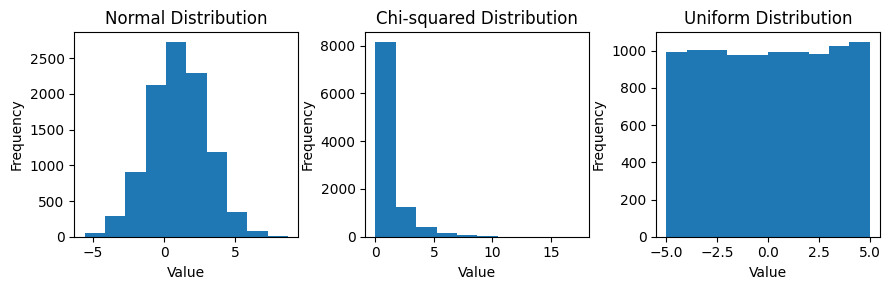

In [76]:
# Create a plot with 1 row, 3 columns
# You will create a list of subfigures "list_subfig"
# You can choose whichever name you like
# The option "figsize" indicates the (width, height) of the graph

fig, list_subfig = plt.subplots(1, 3, figsize = (9,3))

# First Figure
list_subfig[0].hist(x = norm_vec)
list_subfig[0].set_title("Normal Distribution")
list_subfig[0].set_xlabel("Value")
list_subfig[0].set_ylabel("Frequency")

# Second Figure
list_subfig[1].hist(x = chisq_vec)
list_subfig[1].set_title("Chi-squared Distribution")
list_subfig[1].set_xlabel("Value")
list_subfig[1].set_ylabel("Frequency")

# Complete the third figure (write your own code below)
list_subfig[2].hist(x = unif_vec)
list_subfig[2].set_title("Uniform Distribution")
list_subfig[2].set_xlabel("Value")
list_subfig[2].set_ylabel("Frequency")

# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value as needed

plt.show()

# Note:
# Use the set_title() function for the title of subfigures
# Similarly, use "set_xlabel()" and "set_ylabel()"



### What if we want to organize the figure to be 2x2?

<font size = "4">
    
- Modify the `nrows` and `ncols` in the subplot initialization.
    - Give it a different figure and axes names, such as `fig2, list_subfig2`.
- Modify the index to identify each subplot.
    - For normal distribution, the index is modified to `list_subfig2[0,0]`, which means the first row and first column.
    - Remember that the index always starts from 0!

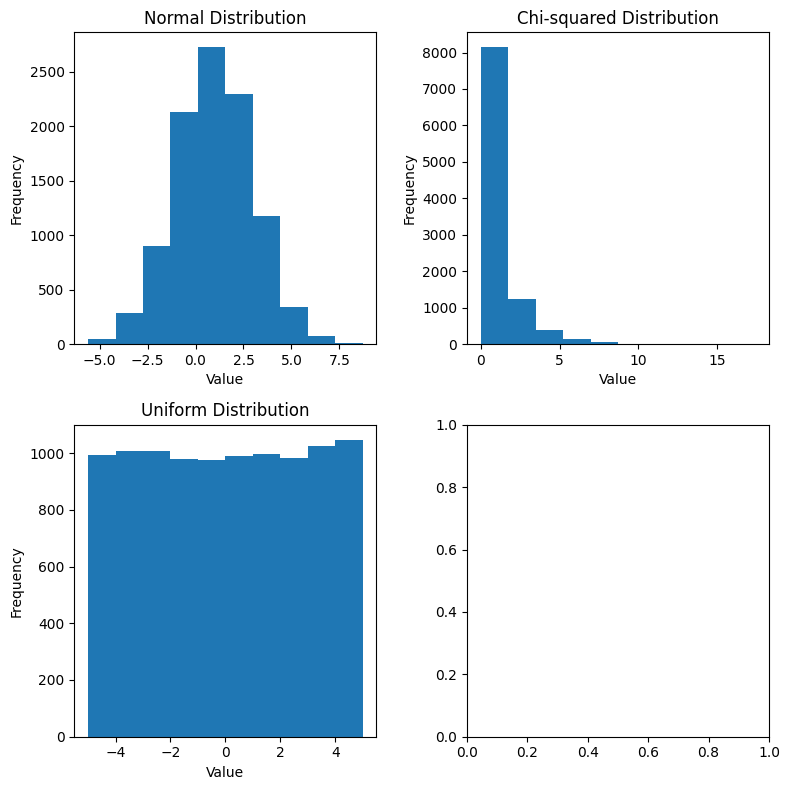

In [77]:
# Write down your code

# Create a plot with 2 row, 2 columns
# You will create a list of subfigures "list_subfig2"
# For consistency, we use list_subfig2 here, but you can change it to any name you want!
# The option "figsize" indicates the (width,height) of the graph, we may need to change it if we convert 1x3 to 2x2.
# The first row contains normal and chi-square, while the second row only contains uniform distribution.
# Complete the code and show the final subplots.

fig2, list_subfig2 = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

list_subfig2[0,0].hist(x = norm_vec)
list_subfig2[0,0].set_title("Normal Distribution")
list_subfig2[0,0].set_xlabel("Value")
list_subfig2[0,0].set_ylabel("Frequency")

list_subfig2[0,1].hist(x = chisq_vec)
list_subfig2[0,1].set_title("Chi-squared Distribution")
list_subfig2[0,1].set_xlabel("Value")
list_subfig2[0,1].set_ylabel("Frequency")

list_subfig2[1,0].hist(x = unif_vec)
list_subfig2[1,0].set_title("Uniform Distribution")
list_subfig2[1,0].set_xlabel("Value")
list_subfig2[1,0].set_ylabel("Frequency")

# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value as needed

plt.show()

## 5. Sequences

<font size = "4">

- Basic syntax: `list(range(start, stop, step))`
    - `start`: the first number in the sequence
    - `stop`: the last number in the sequence **(not included)**
    - `step`: the difference between adjacent numbers in the sequence
- If `start` is omitted, `start=0`.
- If `step` is omitted, `step=1`.
- Remember to convert it to a list, otherwise it is a `range` data type.

In [78]:
# Example:
print(list(range(10)))
print(list(range(1,10)))
print(list(range(1,10,2)))

print(list(range(1,10,1.5)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
print(np.arange(10))
print(np.arange(1,10))
print(np.arange(1,10,2))
# For np.arange, it supports non-integer step.
print(np.arange(1,10,1.5))

In [ ]:
# Use `list(range())` to create the following lists:
# Create a list with the integer numbers from 0 to 100, denoted as int_ls
int_ls = list(range(0, 101, 1))
# you can also simplify it to be
int_ls = list(range(101))
# print(int_ls)

# Create a list with the even numbers from 1 to 100, denoted as even_ls
even_ls = list(range(2,101,2))
# print(even_ls)

# Find the first 10 elements of int_ls and even_ls
# print(int_ls[:10])
# print(even_ls[:10])

# Find the elements excluding the first two elements of int_ls and even_ls.
print(int_ls[2:])
print(even_ls[2:])

## 6. Nested Loops 

- We can nest loops inside each other to iterate over multiple dimensions 🤯
- The inner loop runs to completion for each iteration of the outer loop
- This is useful when we need to iterate over a matrix or a list of lists
- The syntax is simple: [just write a loop inside another loop](https://www.w3schools.com/python/python_nested_loops.asp)
- The inner loop is indented twice: once for the outer loop and once for the inner loop

In [ ]:
for i in range(4):
    for j in range(3):
        print("i = {}, j = {}".format(i, j))

## 7. Central Limit Theorem

<font size='4'>

- The CLT is a fundamental concept in statistics.
- It states that the distribution of the mean (or sum) of many independent, identically distributed random variables approaches to a normal distribution, regardless of the original distribution
- This is true even if the original distribution is NOT normal.
- Let $\bar{X}$ be the sample mean of a random vector $(X_1,\cdots,X_n)$.
- What happens to $\bar{X}$ with different $n$?
    - The Central Limit Theorem makes a prediction!
    - It says that the distribution will have a bell shape with higher $n$.
- Let's verify CLT by simulating random vectors from a uniform distribution from $-4$ to $5$.

In [ ]:
# One way is to write this with repeated code chunks
# Each time will start the process of generating new data from scratch.

iteration_num = 1000

# Simulate with sample size one
sample_size_n = 1
unif_vec1 = []
for iter_num in range(iteration_num):
    vec_unif_iter = np.random.uniform(low=-4, high=5, size=sample_size_n)
    vec_unif_mean_iter = np.round(np.mean(vec_unif_iter), decimals=2)
    unif_vec1.append(float(vec_unif_mean_iter))
    # or 
    # unif_vec1.append(float(vec_unif_iter.mean()))
    # use float to convert numpy.float64 to float numbers
print(unif_vec1[:5])

In [ ]:
# Write your own code for sample_size_n=10, 50, and 100
# Name it as unif_vec10, unif_vec50, and unif_vec100, respectively.
# You can recycle vec_unif_iter because it will be updated automatically once you assign the value from np.random.uniform to it.
# Similarly, you can recycle iter_num.

sample_size_n = 10
unif_vec10 = []
for iter_num in range(iteration_num):
    vec_unif_iter = np.random.uniform(low=-4, high=5, size=sample_size_n)
    vec_unif_mean_iter = np.round(np.mean(vec_unif_iter), decimals=2)
    unif_vec10.append(float(vec_unif_mean_iter))

sample_size_n = 50
unif_vec50 = []
for iter_num in range(iteration_num):
    vec_unif_iter = np.random.uniform(low=-4, high=5, size=sample_size_n)
    vec_unif_mean_iter = np.round(np.mean(vec_unif_iter), decimals=2)
    unif_vec50.append(float(vec_unif_mean_iter))

sample_size_n = 100
unif_vec100 = []
for iter_num in range(iteration_num):
    vec_unif_iter = np.random.uniform(low=-4, high=5, size=sample_size_n)
    vec_unif_mean_iter = np.round(np.mean(vec_unif_iter), decimals=2)
    unif_vec100.append(float(vec_unif_mean_iter))

In [ ]:
# Suppose that you have unif_vec1, unif_vec10, unif_vec50, and unif_vec100
# Create a 2x2 subplot to display histograms of above four random variables.
# The first row: unif_vec1 (left) and unif_vec10 (right)
# The second row: unif_vec50 (left) and unif_vec100 (right)
fig3, listfig3 = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

listfig3[0,0].hist(unif_vec1)
listfig3[0,1].hist(unif_vec10)
listfig3[1,0].hist(unif_vec50)
listfig3[1,1].hist(unif_vec100)
plt.tight_layout()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value as needed
plt.show()


<font size = "5">
Nested Loops

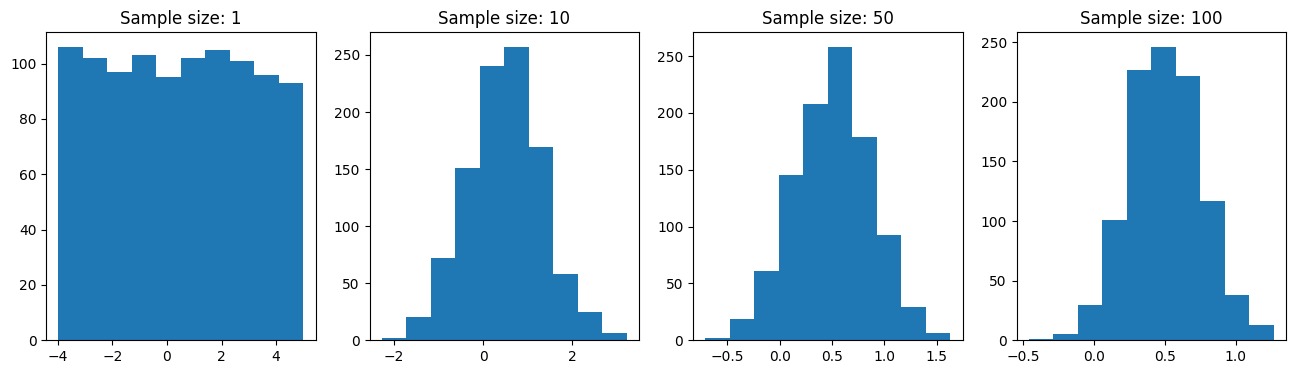

In [79]:
# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

iteration_num = 1000
sample_size_ls = [1,10,50,100]
unif_vec_ls_ls = []

for sample_size_iter in sample_size_ls:

    # initialize unif_vec_sample_size_ls first
    unif_vec_sample_size_ls = []
    for iter_num in range(iteration_num):
        vec_unif_iter = np.random.uniform(low=-4, high=5, size=sample_size_iter)
        vec_unif_mean_iter = np.round(np.mean(vec_unif_iter), decimals=2)
        unif_vec_sample_size_ls.append(float(vec_unif_mean_iter))

    unif_vec_ls_ls.append(unif_vec_sample_size_ls)

# print(unif_vec_ls_ls)
# It will be a list with four element, and each element is another list with 1000 floating numbers.
# This time, let's create a 1x4 subplot to show them in the same row.

fig4, listfig4 = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for i_iter, sample_size_iter in enumerate(sample_size_ls):
    listfig4[i_iter].hist(unif_vec_ls_ls[i_iter])
    listfig4[i_iter].set_title('Sample size: {}'.format(sample_size_iter))

plt.show()

## 8. For Loops + if/else statements

<font size='4'>

- In addition to nested for loop, we can write `if/else` statements within the for loop.
- General syntax looks like:
  
`for iter_id in total_ls:` <br>
`    if condition1:` <br>
`        statement1` <br>
`    else:` <br>
`        statement2` <br>

<font size='4'>

- We illustrate this function via simulating discrete random variable from a uniform distribution.
- Suppose we want to randomize a clinical trial of two treatment groups to a $N_{total}$ patients with a 2:1 ratio, how can we generate the treatment group id for each participant to make it **random** and approximately follow the **2:1** ratio?
- We define two treatment groups as 1 and 2 such that the number of group 1 is 2 times the number of group 2.
- We can generate a random variable $U\sim Uniform(0,1)$.
- If $U<2/3$, we assign it to group 1, otherwise, we assign it to group 2.
- We replicate it for $N_{total}$ times, which is the number of participants in the clinical trial.

In [ ]:
# write your own code
# define N_total (the number of patients)
N_total = 1000

# set seed
np.random.seed(100)

# Initialize an empty list (or an array) to save the treatment group id.
treatment_ls = []
for n_iter in range(N_total):
    # simulate a random variable from uniform distribution (0,1)
    u_iter = np.random.uniform(low=0, high=1, size=None)
    if u_iter < 2/3:
        treatment_ls.append(1)
    else:
        treatment_ls.append(2)

treatment_ls = np.array(treatment_ls)
# print out the first ten samples
print(treatment_ls[:10])
print('Group 1 has {} patients, while group 2 has {} patients'.format(
    np.sum(treatment_ls == 1), np.sum(treatment_ls == 2))
)

# Notice that when sample size is small, the ratio may not be exactly 2:1 due to the randomness.
# If you change your N_total from 100 to 1000, your results will be closer to 2:1.

<font size='4'>

- What if we have three treatment groups with a 2:2:1 ratio? (This will be part of your HW5).
- Expand your current one cutoff to two cutoffs.